<a href="https://colab.research.google.com/github/GolDDragon1702/GGColab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [19]:
def load_data(batch_size=128, resize=(224,224)):
    transform = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))])
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, test_loader

In [20]:
def fit(model, train_loader, test_loader, optimizer, criterion, num_epochs = 10):
    train_losses, val_losses, val_accuracies = [], [], []

    for epoch in range(1, num_epochs + 1):
        train_loss, val_loss, val_acc = fit_epoch(model, train_loader, test_loader, optimizer, criterion)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Epoch {epoch}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}, val_acc={val_acc:.4f}')

    plot_metrics(range(1, num_epochs + 1), train_losses, val_losses, val_accuracies)

In [21]:
def fit_epoch(model, train_loader, test_loader, optimizer, criterion):
    model.train()
    train_loss = 0
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)

    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target).sum().item()

    test_loss /= len(test_loader)
    accuracy = correct / len(test_loader.dataset)

    return train_loss, test_loss, accuracy

In [22]:
def plot_metrics(epochs, train_losses, val_losses, val_accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Training and Validation Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()

# **LeNet**

In [ ]:
class LeNet(nn.Sequential):
    def __init__(self, lr= 0.1, num_classes=10):
        super(LeNet, self).__init__(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes)
        )

Epoch 1: train_loss=2.3051, val_loss=2.3030, val_acc=0.1000
Epoch 2: train_loss=2.3036, val_loss=2.3030, val_acc=0.1000
Epoch 3: train_loss=1.6609, val_loss=0.5990, val_acc=0.7748
Epoch 4: train_loss=0.5031, val_loss=0.4787, val_acc=0.8223
Epoch 5: train_loss=0.4224, val_loss=0.4378, val_acc=0.8408
Epoch 6: train_loss=0.3731, val_loss=0.4052, val_acc=0.8482
Epoch 7: train_loss=0.3452, val_loss=0.3700, val_acc=0.8637
Epoch 8: train_loss=0.3206, val_loss=0.3544, val_acc=0.8697
Epoch 9: train_loss=0.2999, val_loss=0.3434, val_acc=0.8761
Epoch 10: train_loss=0.2850, val_loss=0.3608, val_acc=0.8688


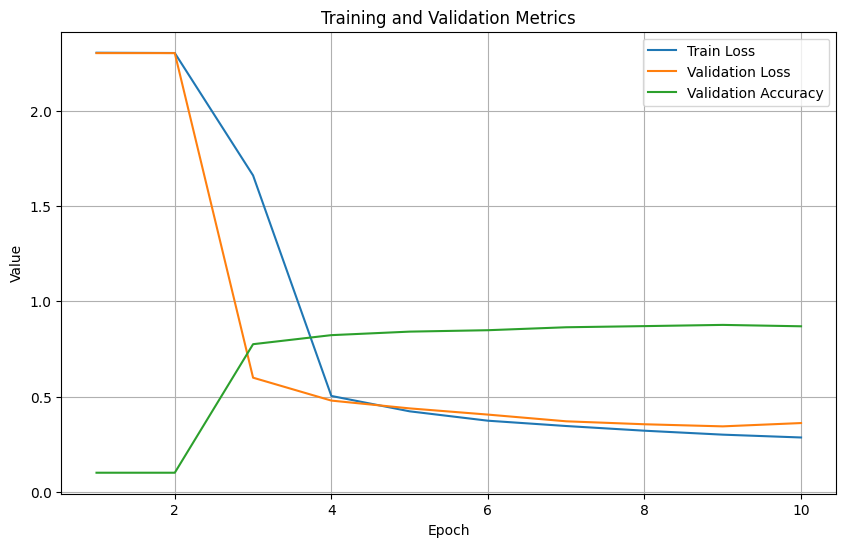

In [ ]:
train_loader, test_loader = load_data(batch_size = 64, resize=(28,28))
model = LeNet(num_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
num_epochs = 10

fit(model, train_loader, test_loader, optimizer, criterion, num_epochs)

# **AlexNet**

In [ ]:
class AlexNet(nn.Sequential):
    def __init__(self, lr=0.1, num_classes=10):
        super(AlexNet, self).__init__(
            nn.LazyConv2d(96, kernel_size=11, stride=4), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(),
            nn.LazyLinear(num_classes)
        )

Epoch 1: train_loss=0.6286, val_loss=0.3796, val_acc=0.8617
Epoch 2: train_loss=0.3539, val_loss=0.3341, val_acc=0.8758
Epoch 3: train_loss=0.3046, val_loss=0.3181, val_acc=0.8849
Epoch 4: train_loss=0.2751, val_loss=0.2942, val_acc=0.8922
Epoch 5: train_loss=0.2594, val_loss=0.2596, val_acc=0.9014
Epoch 6: train_loss=0.2410, val_loss=0.2629, val_acc=0.9044
Epoch 7: train_loss=0.2266, val_loss=0.2687, val_acc=0.9043
Epoch 8: train_loss=0.2181, val_loss=0.2633, val_acc=0.9048
Epoch 9: train_loss=0.2151, val_loss=0.2655, val_acc=0.9091
Epoch 10: train_loss=0.2018, val_loss=0.2894, val_acc=0.9032


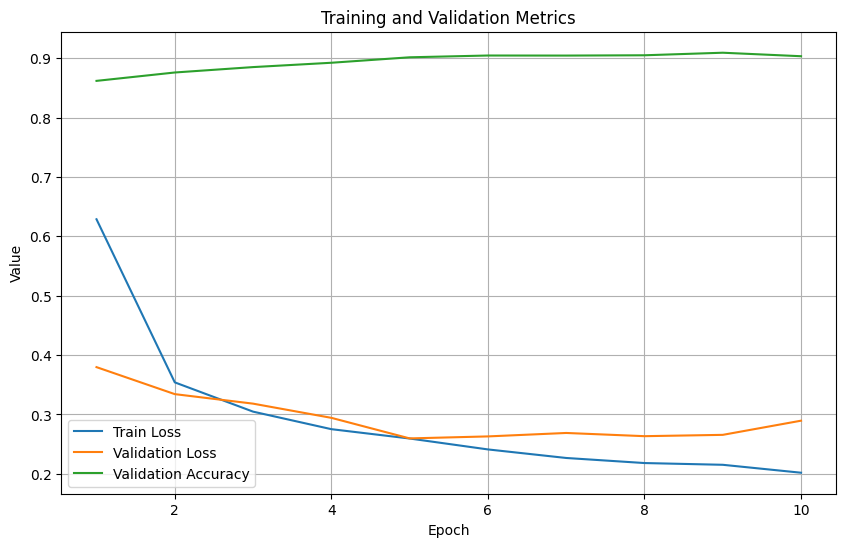

In [ ]:
train_loader, test_loader = load_data()
model = AlexNet(lr=0.01, num_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
num_epochs = 10

fit(model, train_loader, test_loader, optimizer, criterion, num_epochs)

# **VGG**

In [23]:
def vgg_block(out_channels, num_convs, pool=True):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    if pool:
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

class VGG(nn.Sequential):
    def __init__(self, arch, num_classes=10):
        layers = self.make_layers(arch)
        classifier = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(),
            nn.LazyLinear(num_classes)
        )
        super(VGG, self).__init__(*layers, classifier)

    def make_layers(self, arch):
        layers = []
        for out_channels, num_convs in arch:
            layers.append(vgg_block(out_channels, num_convs))
        return layers

In [24]:
# Các cấu trúc VGG khác nhau
VGG11_ARCH = [(64, 1), (128, 1), (256, 2), (512, 2), (512, 2)]
VGG13_ARCH = [(64, 2), (128, 2), (256, 2), (512, 2), (512, 2)]
VGG16_ARCH = [(64, 2), (128, 2), (256, 3), (512, 3), (512, 3)]
VGG19_ARCH = [(64, 2), (128, 2), (256, 4), (512, 4), (512, 4)]

In [ ]:
train_loader, test_loader = load_data()
model = VGG(VGG11_ARCH, num_classes=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
num_epochs = 5

fit(model, train_loader, test_loader, optimizer, criterion, num_epochs)

Epoch 1: train_loss=417650.3797, val_loss=2.3027, val_acc=0.1000
